# KNN classifier for Car Dataset

# 1. Module Imports

In [284]:
# import numpy and pandas
import numpy as np
import pandas as pd

# import sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# import category encoders
import category_encoders as ce

# 2. Import Dataset

In [285]:
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/" 
dataset = "car.data"
response = requests.get(url+dataset,allow_redirects=True)
print(response)
with open(dataset,'wb') as dataset_writer:
    dataset_writer.write(response.content)

<Response [200]>


In [286]:
raw_dataset = pd.read_csv(dataset, sep=',', header=None, skipinitialspace=True)

In [287]:
# print dataset info 
raw_dataset.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 3. Exploratory Data Analysis

__3.1 Rename column names__

Since the dataset does not have proper column names and they are labelled as 0,1,2.... and so on. Let's give proper names to the columns.

In [288]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

raw_dataset.columns = col_names

# print dataset info after defining the column names 
raw_dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


__3.2 Determine shape of data__

In [289]:
raw_dataset.shape

(1728, 7)

__3.3 Determine type of data__

In [290]:
# print dataset info 
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


__3.4 Compute some basic statistical details__

In [291]:
raw_dataset.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


__3.5 Frequency distribution of values in variables__

In [292]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(raw_dataset[col].value_counts())

low      432
high     432
vhigh    432
med      432
Name: buying, dtype: int64
low      432
high     432
vhigh    432
med      432
Name: maint, dtype: int64
2        432
3        432
5more    432
4        432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


__3.6 Summary of variables__

a. There are 7 variables in the dataset. All the variables are of categorical data type.

b. These are given by buying, maint, doors, persons, lug_boot, safety and class.

c. class is the target variable.

__3.7 Explore Target variable__

In [293]:
raw_dataset['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The class target variable is ordinal in nature.

__3.8 Missing values in variables__

In [294]:
# check missing values in variables

raw_dataset.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# 4. Declare feature vector and target variable

In [295]:
raw_dataset_backup = raw_dataset
X = raw_dataset.drop(['class'], axis=1)

y = raw_dataset['class']

# 5. Split data into separate training and test set

In [296]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [297]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# 6. Feature Engineering


In [298]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [299]:
# print dataset info before encoding categorical variables with ordinal encoding
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [300]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [301]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [302]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# 7. Implement KNN Classifier model

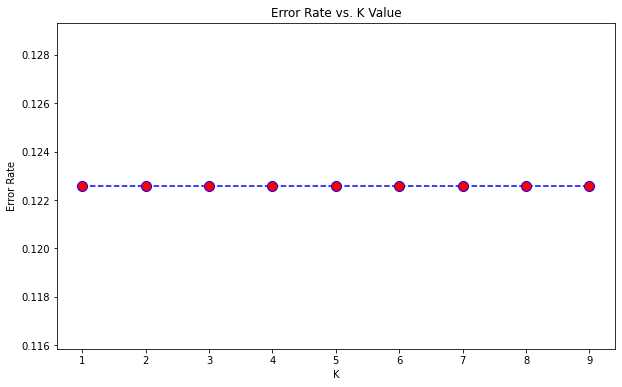

In [303]:
# instantiate the classifier 
knn = KNeighborsClassifier()
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# fit the model
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')
# Predict the Test set results
predictions = knn.predict(X_test)

# 8. Calculate accuracy measures

In [304]:
# Check accuracy score
score = accuracy_score(y_test, predictions)
print('Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, predictions)*100))

Model accuracy score is : 87.7408


# 9. Apply PCA

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


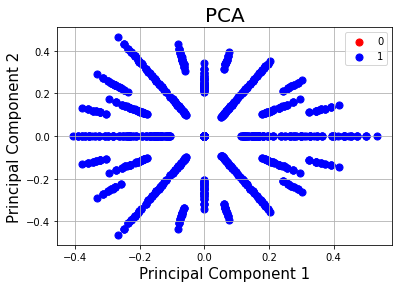

In [305]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
def apply_pca_and_get_final_df(df,target,show_graph=True):
    X = df.drop([target], axis=1)
    y = df[target]
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X.values)
    principalDf = pd.DataFrame(data=principalComponents
                               , columns=['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y], axis=1)
    if show_graph:
        fig, ax = plt.subplots()
        ax.set_xlabel('Principal Component 1', fontsize=15)
        ax.set_ylabel('Principal Component 2', fontsize=15)
        ax.set_title('PCA', fontsize=20)
        targets = [0, 1]
        colors = ['r', 'b']
        for target, color in zip(targets, colors):
            indicesToKeep = finalDf['class'] == target
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c=color
                       , s=50)
        ax.legend(targets)
        ax.grid() 
    return finalDf

from sklearn.preprocessing import Normalizer
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class'])
raw_dataset = encoder.fit_transform(raw_dataset_backup)
raw_dataset.loc[:, raw_dataset.columns != 'class'] = scaler.fit_transform(raw_dataset.loc[:, raw_dataset.columns != 'class'])
final_df = apply_pca_and_get_final_df(raw_dataset,'class')

# 10. Again Apply KNN model on PCA components

In [306]:
finalDf = pd.DataFrame(raw_dataset).fillna(raw_dataset.mean())
X = finalDf.drop(['class'], axis=1)
Y = finalDf['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 )

# instantiate the classifier 
knn = KNeighborsClassifier()



# fit the model
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')
# Predict the Test set results
predictions = knn.predict(X_test)

print ("Accuracy : ", accuracy_score(y_test,predictions)*100, "\n") 

Accuracy :  90.5587668593449 

